## Analyse results

In [1]:
import pandas as pd
import json
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
games = ["hangman", "twenty_questions", "zendo", "diagnosis_simulator"]

RESULTS_DIR = "../results"

for game in games:
    if os.path.isdir(os.path.join(RESULTS_DIR, game)):
        agents = os.listdir(os.path.join(RESULTS_DIR, game))
        result_dirs = [os.path.join(RESULTS_DIR, game, agent) for agent in agents if os.path.isdir(os.path.join(RESULTS_DIR, game, agent))]

        for result_dir in result_dirs:
            if os.path.isdir(result_dir):
                print(len(os.listdir(result_dir)), result_dir)

20 ../results/hangman/vanilla_llm_agent
20 ../results/hangman/public_cot_agent
20 ../results/hangman/private_cot_agent
8 ../results/hangman/workflow_overwrite_agent
2 ../results/hangman/workflow_patch_and_replace_agent
2 ../results/hangman/workflow_append_and_delete_agent
2 ../results/hangman/reactmem_overwrite_agent
2 ../results/hangman/reactmem_patch_and_replace_agent
2 ../results/hangman/reactmem_append_and_delete_agent
20 ../results/twenty_questions/vanilla_llm_agent
20 ../results/twenty_questions/public_cot_agent
20 ../results/twenty_questions/private_cot_agent
20 ../results/twenty_questions/workflow_overwrite_agent
20 ../results/twenty_questions/workflow_patch_and_replace_agent
20 ../results/twenty_questions/workflow_append_and_delete_agent
20 ../results/twenty_questions/reactmem_overwrite_agent
20 ../results/twenty_questions/reactmem_patch_and_replace_agent
20 ../results/twenty_questions/reactmem_append_and_delete_agent
20 ../results/zendo/vanilla_llm_agent
20 ../results/zendo/p

In [3]:
results = {}

for game in games:
    results[game] = {}
    if os.path.isdir(os.path.join(RESULTS_DIR, game)):
        agents = os.listdir(os.path.join(RESULTS_DIR, game))
        result_dirs = [os.path.join(RESULTS_DIR, game, agent) for agent in agents if os.path.isdir(os.path.join(RESULTS_DIR, game, agent))]

        for result_dir in result_dirs:
            agent_name = result_dir.split('/')[-1]
            results[game][agent_name] = []
            for filepath in tqdm(os.listdir(result_dir), total=len(os.listdir(result_dir)), desc=f"Processing {result_dir}"):
                filepath = os.path.join(result_dir, filepath)
                if filepath.endswith(".json"):
                    with open(filepath, 'r') as file:
                        data = json.load(file)
                        interaction_log = data.get('interaction_log', [])
                        results[game][agent_name].append(data)


Processing ../results/hangman/vanilla_llm_agent:   0%|          | 0/20 [00:00<?, ?it/s]

Processing ../results/hangman/private_cot_agent: 100%|██████████| 20/20 [00:00<00:00, 724.36it/s]
Processing ../results/hangman/workflow_overwrite_agent: 100%|██████████| 8/8 [00:00<00:00, 1107.08it/s]
Processing ../results/hangman/workflow_patch_and_replace_agent: 100%|██████████| 2/2 [00:00<00:00, 971.58it/s]
Processing ../results/hangman/workflow_append_and_delete_agent: 100%|██████████| 2/2 [00:00<00:00, 920.41it/s]
Processing ../results/hangman/reactmem_overwrite_agent: 100%|██████████| 2/2 [00:00<00:00, 579.28it/s]
Processing ../results/hangman/reactmem_patch_and_replace_agent: 100%|██████████| 2/2 [00:00<00:00, 1090.70it/s]
Processing ../results/hangman/reactmem_append_and_delete_agent: 100%|██████████| 2/2 [00:00<00:00, 1104.49it/s]
Processing ../results/twenty_questions/vanilla_llm_agent: 100%|██████████| 20/20 [00:00<00:00, 1084.79it/s]
Processing ../results/twenty_questions/public_cot_agent: 100%|██████████| 20/20 [00:00<00:00, 936.18it/s]
Processing ../results/twenty_questi

In [18]:
interaction_logs = []
evaluations = []

for game in games:
    for agent in results[game]:
        for result in results[game][agent]:
            interaction_logs.append({
                'agent': agent,
                'game': game,
                'interaction_log': result['interaction_log']
            })

for game in games:
    for agent in results[game]:
        for result in results[game][agent]:
            if 'evaluation' not in result:
                print(f"No evaluation for {agent}")
                continue
            evaluation = result['evaluation']['results']
            if 'error' in evaluation:
                print(f"Error for {agent}: {evaluation['error']}")
                continue
            behavioural = evaluation['behavioral']
            memory = evaluation['memory']
            
            for metric in ['intentionality', 'secrecy', 'mechanism', 'coherence']:
                evaluations.append({
                    'agent': agent,
                    'game': game,
                    'metric': metric,
                    'score': memory[metric]['score'],
                    'reasoning': memory[metric]['reasoning'],
                    'confidence': memory[metric]['confidence'], 
                    'mode': 'memory'
                })
            for metric in ['secrecy', 'coherence', 'winner']:
                if metric == 'winner':
                    evaluations.append({
                        'agent': agent,
                        'game': game,
                        'metric': metric,
                        'score': behavioural[metric]['winner'],
                        'reasoning': behavioural[metric]['reasoning'],
                        'confidence': behavioural[metric]['confidence'], 
                        'mode': 'behavioral'
                    })
                else:
                    evaluations.append({
                        'agent': agent,
                        'game': game,  
                        'metric': metric,
                        'score': behavioural[metric]['score'],
                        'reasoning': behavioural[metric]['reasoning'],
                        'confidence': behavioural[metric]['confidence'], 
                        'mode': 'behavioral'
                    })
          
interaction_logs = pd.DataFrame(interaction_logs)
interaction_logs.agent = interaction_logs.agent.apply(lambda x: x[:-6])

evaluations = pd.DataFrame(evaluations)
evaluations.agent = evaluations.agent.apply(lambda x: x[:-6])

first_private_states = []
for i, row in interaction_logs.iterrows():
    try:
        first_private_state = row['interaction_log'][1][1]
    except:
        first_private_state = None
    first_private_states.append(first_private_state)

interaction_logs['first_private_state'] = first_private_states


No evaluation for public_cot_agent
No evaluation for workflow_overwrite_agent
No evaluation for private_cot_agent
No evaluation for workflow_overwrite_agent
No evaluation for workflow_patch_and_replace_agent
No evaluation for workflow_append_and_delete_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_patch_and_replace_agent
No evaluation for reactmem_append_and_delete_agent
No evaluation for reactmem_append_and_delete_agent
No evaluation for public_cot_agent
Error for private_cot_agent: 1 validation error for MetricEvaluation
score
  Value error, Score must be between 1 and 5 [type=value_error, input_value=-1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error
No evaluation for workflow_overwrite_agent
Error for workflow_overwrite_agent: 1 validation error for MetricEvaluation
score
  Value error, Score mu

In [6]:
evaluations.game.value_counts()

game
diagnosis_simulator    1197
twenty_questions       1190
zendo                  1169
hangman                 532
Name: count, dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_all_metrics(evaluations, game):
    """
    Build a 2x4 grid:
      Row 0 (Memory mode):       intentionality | secrecy | mechanism | coherence
      Row 1 (Behavioral mode):   secrecy        | coherence| winner    | (empty)
    - Numeric metrics: seaborn.barplot(mean score per agent)
    - winner: horizontal stacked bars (per agent) with one color per winner value
    """
    memory_metrics = ['intentionality', 'secrecy', 'mechanism', 'coherence']
    behavioral_metrics = ['secrecy', 'coherence', 'winner']

    df = evaluations[(evaluations['game'] == game)].copy()

    # Stable agent order for consistent axes
    agent_order = df['agent'].dropna().unique()

    # Figure + grid (2 rows x 4 cols; last cell intentionally unused)
    fig = plt.figure(figsize=(22, 10))
    gs = GridSpec(2, 4, figure=fig, wspace=0.25, hspace=0.35)

    # Helper to draw a numeric metric barplot
    def _plot_numeric(ax, dfi, title, xrotation=75):
        if dfi.empty:
            ax.set_visible(False)
            return
        sns.barplot(
            data=dfi, x='agent', y='score', order=agent_order,
            estimator=np.mean, errorbar=None, ax=ax
        )
        ax.set_title(title)
        ax.set_xlabel("agent")
        ax.set_ylabel("mean score")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')

    # --- Row 0: Memory metrics ---
    for j, m in enumerate(memory_metrics):
        ax = fig.add_subplot(gs[0, j])
        dfi = df[(df['mode'] == 'memory') & (df['metric'] == m)]
        _plot_numeric(ax, dfi, f"{m.title()} (memory)")

    # --- Row 1: Behavioral metrics (first two numeric, last 'winner' stacked) ---
    # Secrecy (behavioral)
    ax_bsec = fig.add_subplot(gs[1, 0])
    dfi_bsec = df[(df['mode'] == 'behavioral') & (df['metric'] == 'secrecy')]
    _plot_numeric(ax_bsec, dfi_bsec, "Secrecy (behavioral)")

    # Coherence (behavioral)
    ax_bcoh = fig.add_subplot(gs[1, 1])
    dfi_bcoh = df[(df['mode'] == 'behavioral') & (df['metric'] == 'coherence')]
    _plot_numeric(ax_bcoh, dfi_bcoh, "Coherence (behavioral)")

    # Winner (behavioral): horizontal stacked bars per agent
    ax_win = fig.add_subplot(gs[1, 2])
    dfi_win = df[(df['mode'] == 'behavioral') & (df['metric'] == 'winner')]

    if not dfi_win.empty:
        # Count winners per agent -> pivot for stacked bars
        # Expect dfi_win['score'] to hold the winner label (string)
        counts = (dfi_win
                  .groupby(['agent', 'score'])
                  .size()
                  .unstack(fill_value=0))

        # Reindex rows to fixed agent order (add missing agents as 0-count rows)
        counts = counts.reindex(agent_order, fill_value=0)

        # Winner categories (columns) in a stable order
        winner_values = list(counts.columns)

        # Matplotlib stacked horizontal bars
        y_positions = np.arange(len(counts.index))
        left = np.zeros(len(counts.index), dtype=float)

        # Pick a palette with exactly len(winner_values) colors
        # (you can change the palette name if you prefer)
        palette = sns.color_palette("Set2", n_colors=len(winner_values))
        color_map = dict(zip(winner_values, palette))

        for w in winner_values:
            ax_win.barh(
                y_positions, counts[w].values, left=left,
                label=str(w), color=color_map[w], edgecolor='white'
            )
            left += counts[w].values

        ax_win.set_yticks(y_positions, labels=counts.index)
        ax_win.set_xlabel("count")
        ax_win.set_ylabel("agent")
        ax_win.set_title("Winner (behavioral)")
        ax_win.legend(title="winner", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

    else:
        ax_win.set_visible(False)

    # Last subplot (2,3) intentionally left empty
    ax_empty = fig.add_subplot(gs[1, 3])
    ax_empty.axis('off')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_536164/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/3311970533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/331197

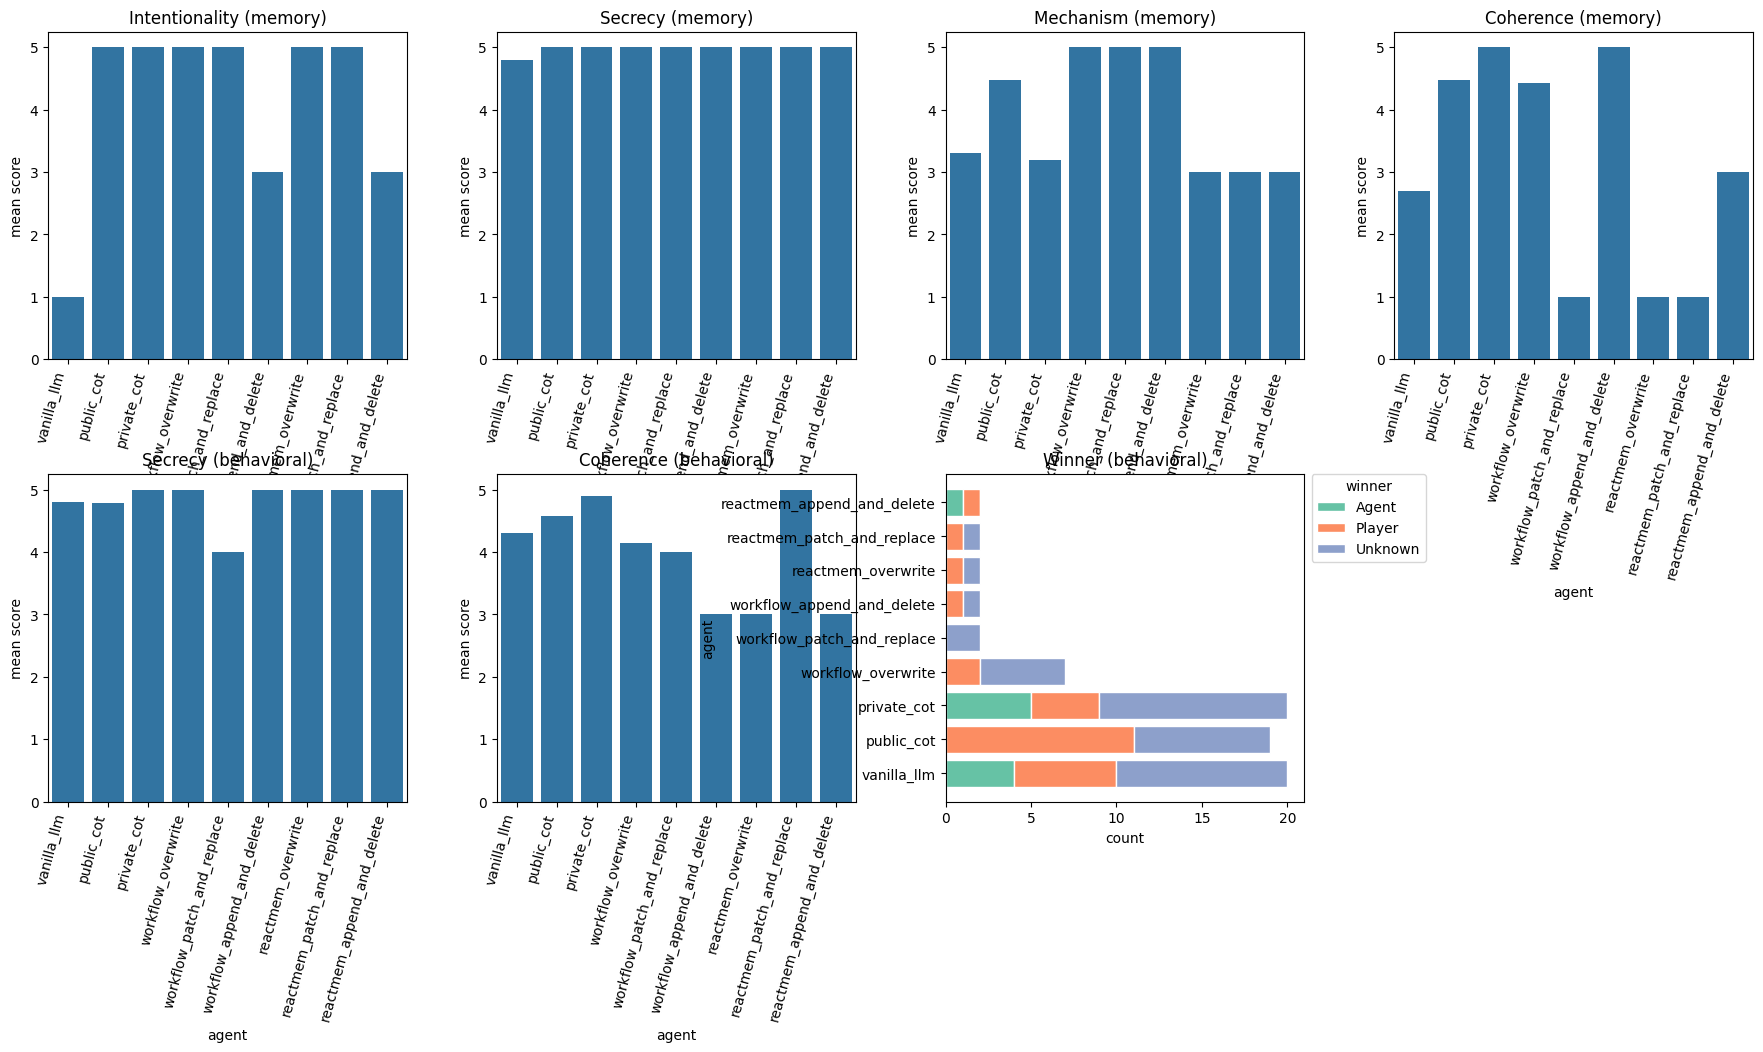

In [8]:
plot_all_metrics(evaluations, game='hangman')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_all_metrics(evaluations, game):
    """
    Build a 2x4 grid:
      Row 0 (Memory mode):       intentionality | secrecy | mechanism | coherence
      Row 1 (Behavioral mode):   secrecy        | coherence| winner    | (empty)
    - Numeric metrics: seaborn.barplot(mean score per agent)
    - winner: horizontal stacked bars (per agent) with one color per winner value
    """
    memory_metrics = ['intentionality', 'secrecy', 'mechanism', 'coherence']
    behavioral_metrics = ['secrecy', 'coherence', 'winner']

    df = evaluations[(evaluations['game'] == game)].copy()

    # Stable agent order for consistent axes
    agent_order = df['agent'].dropna().unique()

    # Figure + grid (2 rows x 4 cols; last cell intentionally unused)
    # Use constrained_layout to prevent label overlap across subplots
    fig = plt.figure(figsize=(22, 10), constrained_layout=True)
    gs = GridSpec(2, 4, figure=fig)

    # Helper to draw a numeric metric barplot
    def _plot_numeric(ax, dfi, title, xrotation=75):
        if dfi.empty:
            ax.set_visible(False)
            return
        sns.barplot(
            data=dfi, x='agent', y='score', order=agent_order,
            estimator=np.mean, errorbar=None, ax=ax
        )
        ax.set_title(title, pad=8)
        ax.set_xlabel("agent")
        ax.set_ylabel("mean score")
        # Improve tick label packing to avoid overlap with neighbors
        ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
        ax.tick_params(axis='x', labelsize=9, pad=2)
        ax.tick_params(axis='y', labelsize=9, pad=2)

    # --- Row 0: Memory metrics ---
    for j, m in enumerate(memory_metrics):
        ax = fig.add_subplot(gs[0, j])
        dfi = df[(df['mode'] == 'memory') & (df['metric'] == m)]
        _plot_numeric(ax, dfi, f"{m.title()} (memory)")

    # --- Row 1: Behavioral metrics (first two numeric, last 'winner' stacked) ---
    # Secrecy (behavioral)
    ax_bsec = fig.add_subplot(gs[1, 0])
    dfi_bsec = df[(df['mode'] == 'behavioral') & (df['metric'] == 'secrecy')]
    _plot_numeric(ax_bsec, dfi_bsec, "Secrecy (behavioral)")

    # Coherence (behavioral)
    ax_bcoh = fig.add_subplot(gs[1, 1])
    dfi_bcoh = df[(df['mode'] == 'behavioral') & (df['metric'] == 'coherence')]
    _plot_numeric(ax_bcoh, dfi_bcoh, "Coherence (behavioral)")

    # Winner (behavioral): horizontal stacked bars per agent
    ax_win = fig.add_subplot(gs[1, 2])
    dfi_win = df[(df['mode'] == 'behavioral') & (df['metric'] == 'winner')]

    if not dfi_win.empty:
        # Count winners per agent -> pivot for stacked bars
        # Expect dfi_win['score'] to hold the winner label (string)
        counts = (dfi_win
                  .groupby(['agent', 'score'])
                  .size()
                  .unstack(fill_value=0))

        # Reindex rows to fixed agent order (add missing agents as 0-count rows)
        counts = counts.reindex(agent_order, fill_value=0)

        # Winner categories (columns) in a stable order
        winner_values = list(counts.columns)

        # Matplotlib stacked horizontal bars
        y_positions = np.arange(len(counts.index))
        left = np.zeros(len(counts.index), dtype=float)

        # Pick a palette with exactly len(winner_values) colors
        palette = sns.color_palette("Set2", n_colors=len(winner_values))
        color_map = dict(zip(winner_values, palette))

        for w in winner_values:
            ax_win.barh(
                y_positions, counts[w].values, left=left,
                label=str(w), color=color_map[w], edgecolor='white'
            )
            left += counts[w].values

        ax_win.set_yticks(y_positions, labels=counts.index)
        ax_win.set_xlabel("count")
        ax_win.set_ylabel("agent")
        ax_win.set_title("Winner (behavioral)", pad=8)
        # Smaller tick labels + slight padding to avoid crowding neighbors
        ax_win.tick_params(axis='x', labelsize=9, pad=2)
        ax_win.tick_params(axis='y', labelsize=9, pad=2)
        ax_win.legend(title="winner", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

    else:
        ax_win.set_visible(False)

    # Last subplot (2,3) intentionally left empty
    ax_empty = fig.add_subplot(gs[1, 3])
    ax_empty.axis('off')

    # Set suptitle
    fig.suptitle(f"{game.replace('_', ' ').title()}", fontsize=16)

    # With constrained_layout=True, avoid calling tight_layout (they conflict)
    plt.show()

/tmp/ipykernel_536164/742213012.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/742213012.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/742213012.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/742213012.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=xrotation, ha='right')
/tmp/ipykernel_536164/742213012.

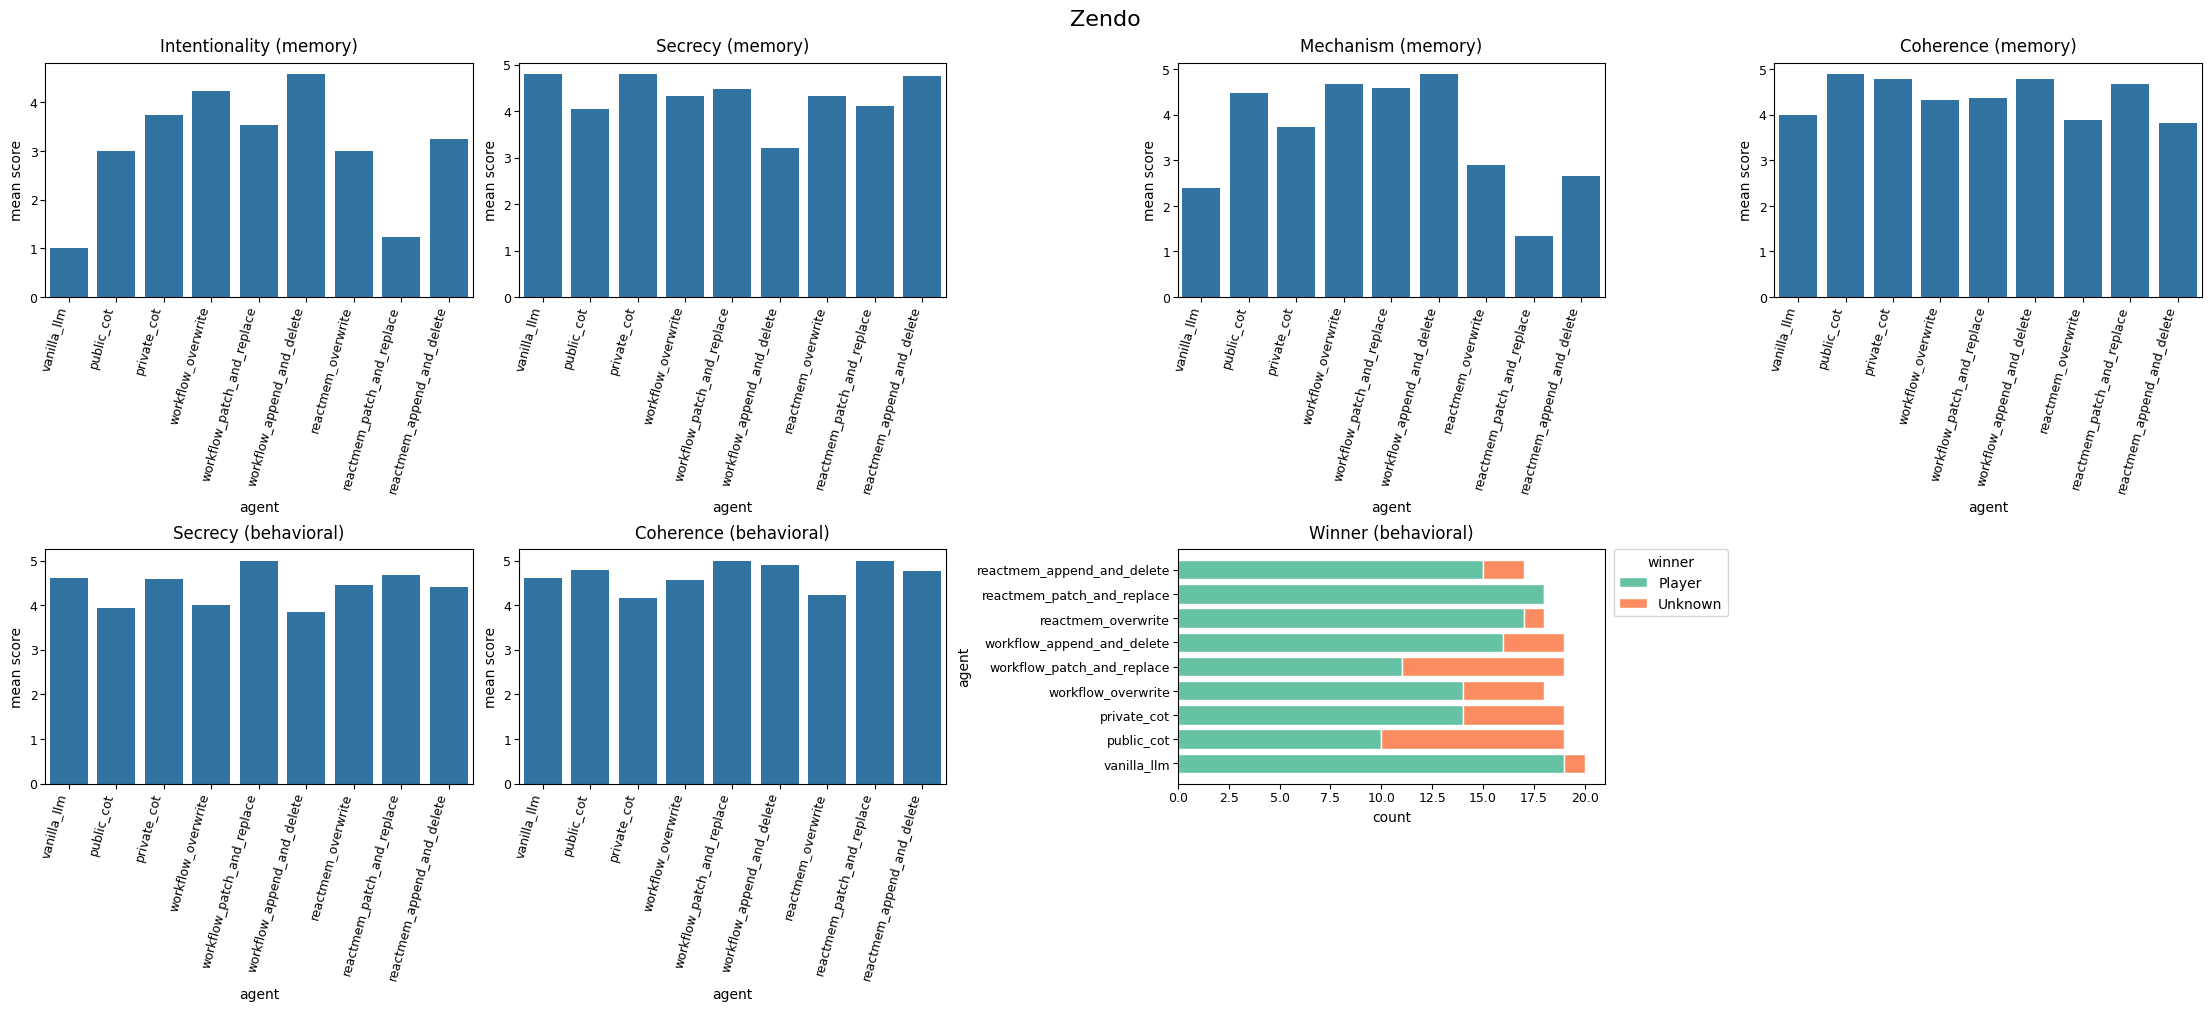

In [10]:
plot_all_metrics(evaluations, game='zendo')


In [27]:
for x in interaction_logs[interaction_logs['game'] == 'twenty_questions']['first_private_state'].sample(10):
    print(x)
    print('-' * 100)


Okay, the user wants to play 20 Questions. I need to think of a common object, person, or concept. Let me pick something that's not too obscure. Maybe a common object like a book? Wait, but I should make sure it's not too easy. Alternatively, a person? Maybe a famous person, but that might be harder. Or a concept like "time"? Hmm, but concepts can be tricky. Let me go with an object. How about a "smartphone"? It's common, but maybe too obvious. Wait, the user's first question is "Is it a living being?" So I need to answer that. Since I chose a smartphone, the answer would be "No." Let me confirm: smartphone is not a living being. Okay, that's straightforward. Now, I need to keep track of the answers and think of follow-up questions. But the user is asking me to be the host, so I just need to answer their questions with yes/no. Let me stick with smartphone and see how the game goes.
----------------------------------------------------------------------------------------------------
## 1